In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('Suicide_Rate.csv')


In [3]:
df.describe()
df.head()


,ParentLocation,ParentLocation.1,Period,Sex,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
0,Africa,Angola,2019,Both sexes,12.55,7.70,19.43
1,Africa,Angola,2019,Male,21.71,13.48,33.23
2,Africa,Angola,2019,Female,4.68,2.74,7.49
3,Africa,Angola,2018,Both sexes,12.35,7.58,19.05
4,Africa,Angola,2018,Male,21.28,13.21,32.49


In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df.dropna(inplace=True)


In [6]:
df.isna().sum()


ParentLocation          0
ParentLocation.1        0
Period                  0
Sex                     0
FactValueNumeric        0
FactValueNumericLow     0
FactValueNumericHigh    0
dtype: int64

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10980 entries, 0 to 10979
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParentLocation        10980 non-null  object 
 1   ParentLocation.1      10980 non-null  object 
 2   Period                10980 non-null  int64  
 3   Sex                   10980 non-null  object 
 4   FactValueNumeric      10980 non-null  float64
 5   FactValueNumericLow   10980 non-null  float64
 6   FactValueNumericHigh  10980 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 686.2+ KB


In [16]:
df.describe()
df.head()


,ParentLocation,ParentLocation.1,Period,Sex,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
0,Africa,Angola,2019,Both sexes,12.55,7.70,19.43
1,Africa,Angola,2019,Male,21.71,13.48,33.23
2,Africa,Angola,2019,Female,4.68,2.74,7.49
3,Africa,Angola,2018,Both sexes,12.35,7.58,19.05
4,Africa,Angola,2018,Male,21.28,13.21,32.49


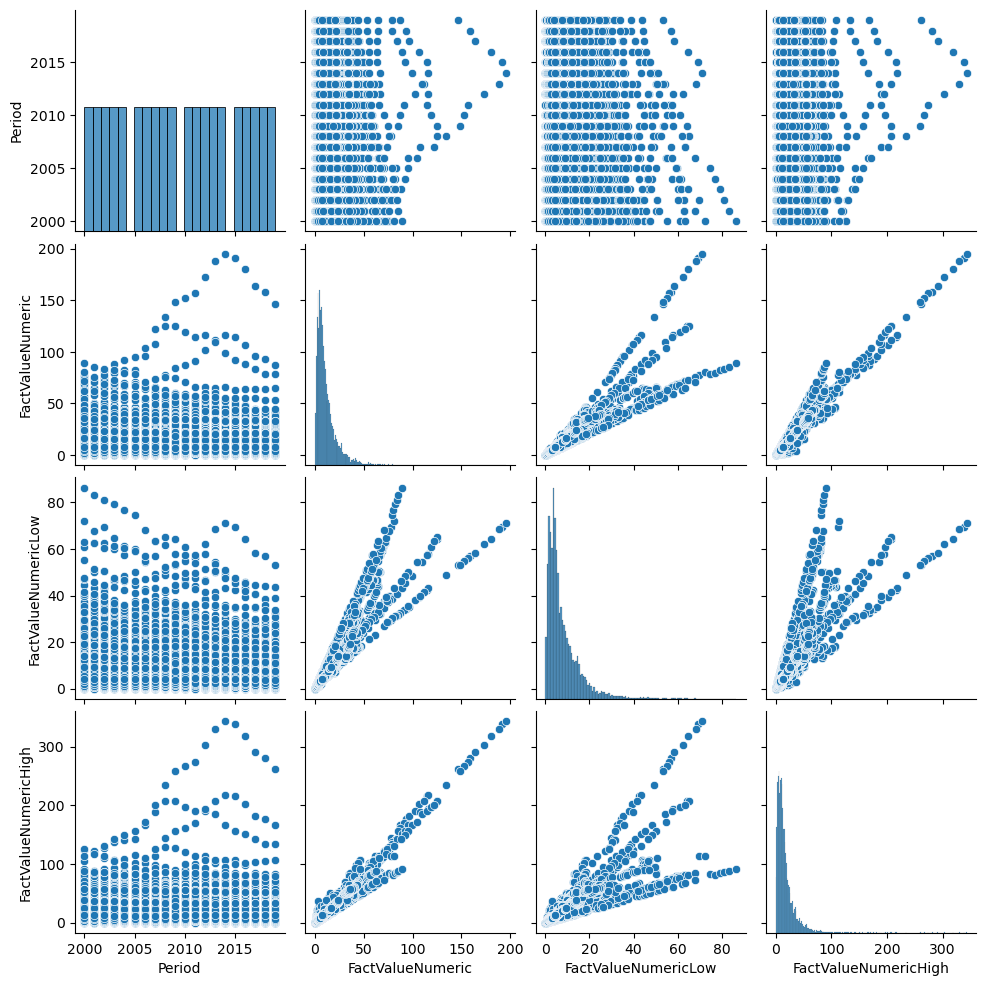

In [17]:
import seaborn as sns
sns.pairplot(df)


In [18]:
import pandas as pd
import seaborn as sns

f = pd.read_csv('Suicide_Rate.csv')


<Axes: xlabel='Sex', ylabel='FactValueNumeric'>

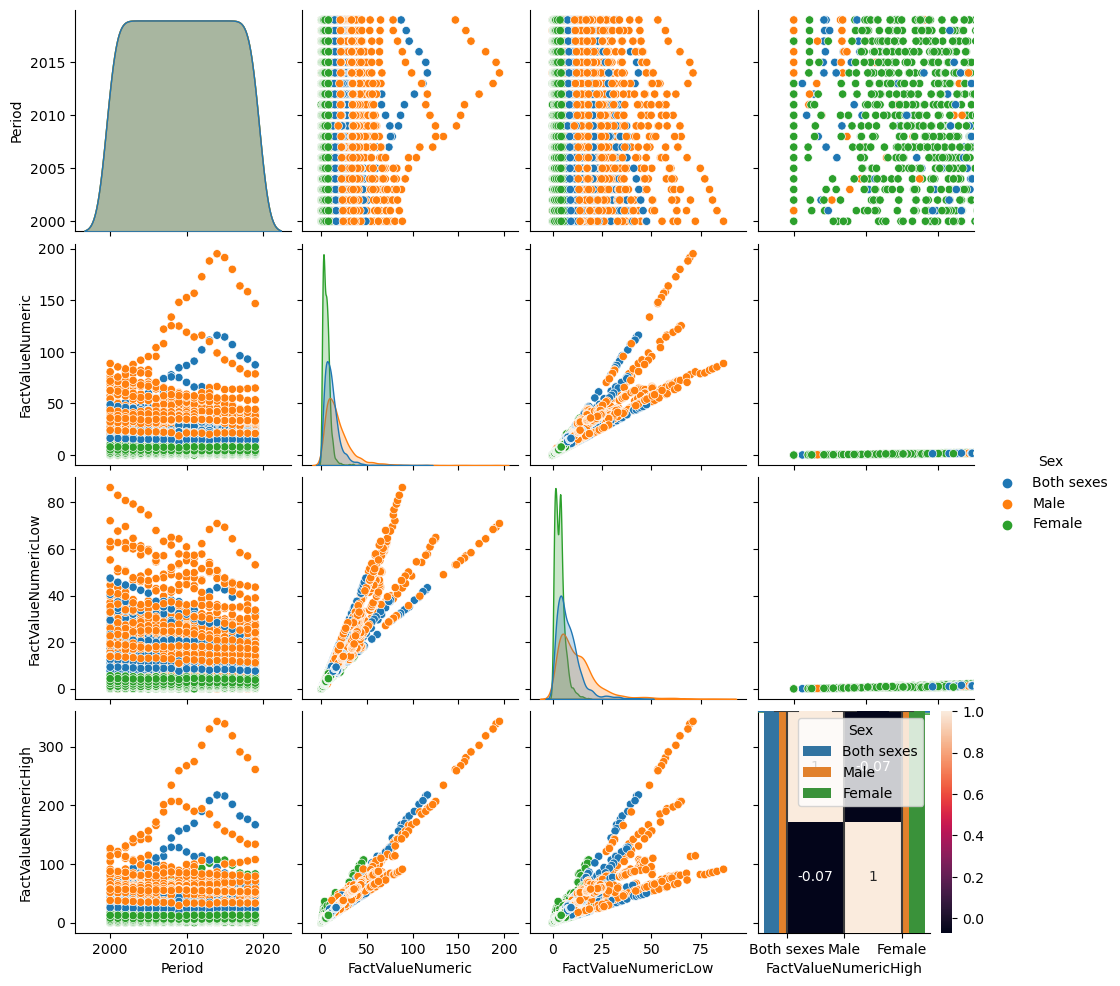

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into a pandas dataframe
df = pd.read_csv('Suicide_Rate.csv', usecols=['ParentLocation', 'ParentLocation.1', 'Period', 'Sex', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh'])

# Classification problem

# Pairplot with hue
sns.pairplot(df, hue='Sex')

# Barplot
sns.barplot(x='ParentLocation', y='FactValueNumeric', hue='Sex', data=df)

# Regression problem

# Correlation matrix
corr = df[['Period', 'FactValueNumeric']].corr()
sns.heatmap(corr, annot=True)

# Boxplot
sns.boxplot(x='Sex', y='FactValueNumeric', data=df)


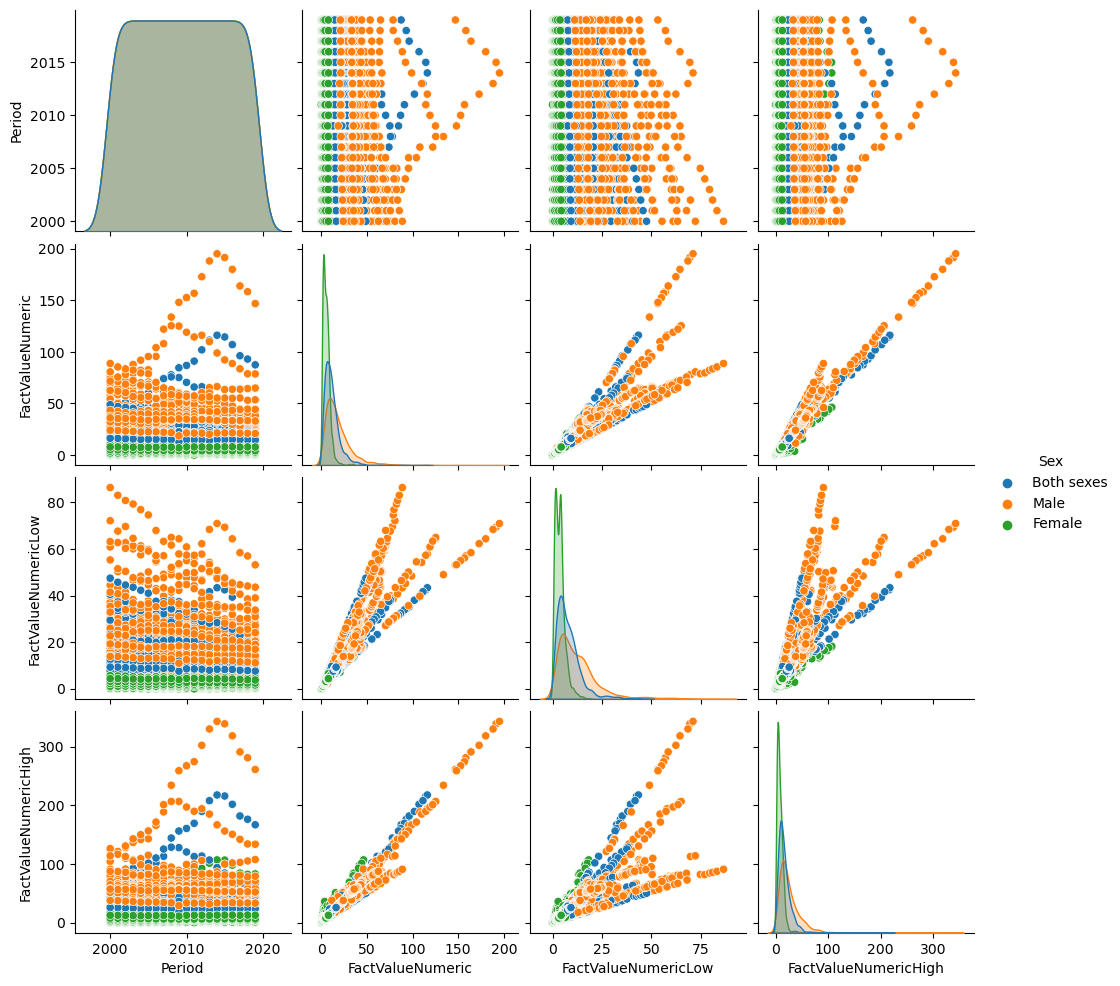

In [20]:
sns.pairplot(df, hue='Sex')


<Axes: xlabel='ParentLocation', ylabel='FactValueNumeric'>

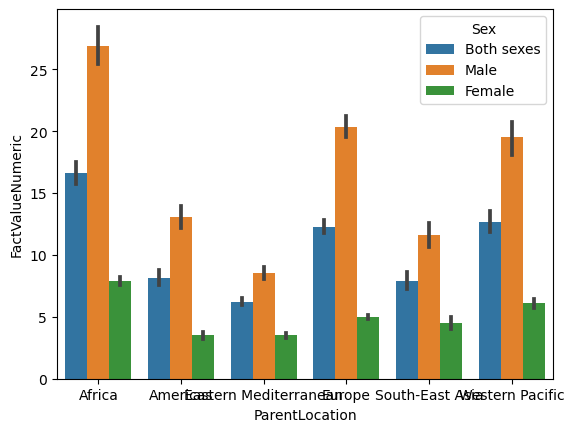

In [21]:
sns.barplot(x='ParentLocation', y='FactValueNumeric', hue='Sex', data=df)


<Axes: >

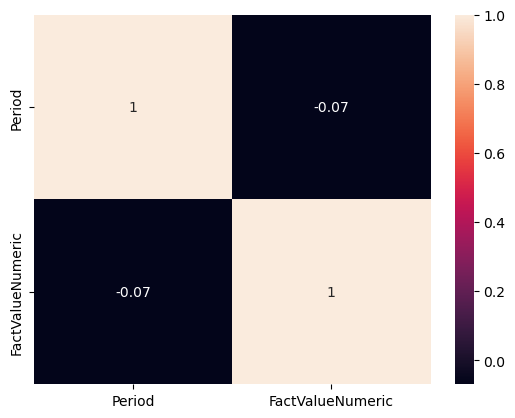

In [22]:
corr = df[['Period', 'FactValueNumeric']].corr()
sns.heatmap(corr, annot=True)


<Axes: xlabel='Sex', ylabel='FactValueNumeric'>

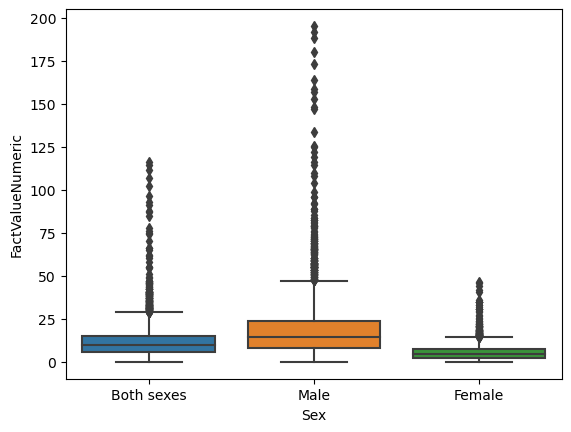

In [23]:
sns.boxplot(x='Sex', y='FactValueNumeric', data=df)


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
df= pd.read_csv('Suicide_Rate.csv')

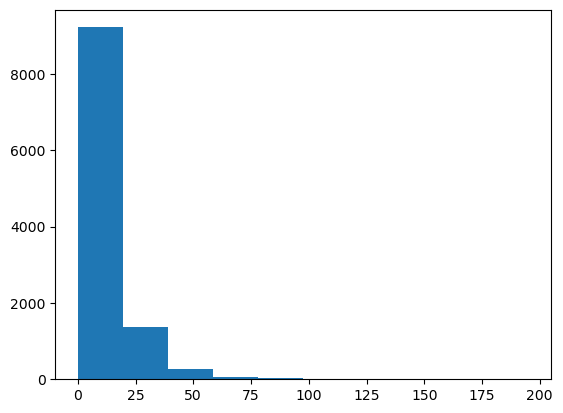

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['FactValueNumeric'])
plt.show()

In [27]:
df = pd.get_dummies(df, columns=['Period', 'Sex'])

In [28]:
X = df.drop(['FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh'], axis=1)
y = df['FactValueNumeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
df = pd.get_dummies(df, columns=['ParentLocation', 'ParentLocation.1'])


In [30]:
X = df.drop(['FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh'], axis=1)
y = df['FactValueNumeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)


MSE: 56.777871153829054
R2: 0.671192679092761


In [32]:
X = df.drop(['FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh'], axis=1)
y = df['FactValueNumeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)


MSE: 56.777871153829054
R2: 0.671192679092761


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the suicide dataset
df = pd.read_csv('Suicide_Rate.csv')

# Select the feature columns and target variable
X = df[['ParentLocation', 'ParentLocation.1', 'Period', 'Sex', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh']]
y = df['Sex']

# One-hot encode the categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Generate the classification accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", acc)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)



Classification Accuracy: 1.0
Confusion Matrix:
 [[1081    0    0]
 [   0 1119    0]
 [   0    0 1094]]
Classification Report:
               precision    recall  f1-score   support

  Both sexes       1.00      1.00      1.00      1081
      Female       1.00      1.00      1.00      1119
        Male       1.00      1.00      1.00      1094

    accuracy                           1.00      3294
   macro avg       1.00      1.00      1.00      3294
weighted avg       1.00      1.00      1.00      3294



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Load data into a pandas dataframe
df = pd.read_csv('Suicide_Rate.csv', usecols=['ParentLocation', 'ParentLocation.1', 'Period', 'Sex', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh'])

# Select features and target
X = df[['ParentLocation.1', 'Period']]
y = df['FactValueNumeric']

# One-hot encode the categorical features
preprocessor = make_column_transformer((OneHotEncoder(), ['ParentLocation.1']), remainder='passthrough')
X = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Compute MAE, MSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')



MAE: 5.11
MSE: 78.54
R^2: 0.55


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv('Suicide_Rate.csv')

# Create the feature matrix X and the target vector y
X = data.drop(['FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh'], axis=1)
y = data['FactValueNumeric']

# One-hot encode the 'ParentLocation', 'ParentLocation.1', 'Period', and 'Sex' columns
X = pd.get_dummies(X, columns=['ParentLocation', 'ParentLocation.1', 'Period', 'Sex'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance using mean absolute error, mean squared error, and R-squared


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the suicide dataset
f = pd.read_csv('Suicide_Rate.csv')

# Choose columns for feature and target variables
X = f[['ParentLocation', 'FactValueNumeric']]
y = f['Sex']

# One-hot-encode the categorical feature column
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Generate the classification accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", acc)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Classification Accuracy: 0.5285367334547663
Confusion Matrix:
 [[536 238 307]
 [360 647 112]
 [386 150 558]]
Classification Report:
               precision    recall  f1-score   support

  Both sexes       0.42      0.50      0.45      1081
      Female       0.63      0.58      0.60      1119
        Male       0.57      0.51      0.54      1094

    accuracy                           0.53      3294
   macro avg       0.54      0.53      0.53      3294
weighted avg       0.54      0.53      0.53      3294



In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the suicide dataset
f = pd.read_csv('Suicide_Rate.csv')

# Choose columns for feature and target variables
X = f[['ParentLocation', 'FactValueNumeric']]
y = f['FactValueNumericLow']

# One-hot-encode the categorical feature column
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Generate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Generate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)


Mean Absolute Error: 1.5156940134272578
Mean Squared Error: 9.158158041948878
R^2: 0.8779395022518872


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Suicide dataset
suicide_data = pd.read_csv('Suicide_Rate.csv')

# Define X and y variables
X = suicide_data[['ParentLocation', 'Period', 'Sex']]  # initial feature selection
y = suicide_data['FactValueNumeric']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['ParentLocation', 'Period', 'Sex'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance with Mean Absolute Error, Mean Squared Error, and R^2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Absolute Error: 6.290926100291252
Mean Squared Error: 131.93130267239266
R^2 Score: 0.2697997975763876


In [58]:
print(df.columns)


Index(['FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh',
       'ParentLocation_Africa', 'ParentLocation_Americas',
       'ParentLocation_Eastern Mediterranean', 'ParentLocation_Europe',
       'ParentLocation_South-East Asia', 'ParentLocation_Western Pacific',
       'ParentLocation.1_Afghanistan',
       ...
       'Period_2013', 'Period_2014', 'Period_2015', 'Period_2016',
       'Period_2017', 'Period_2018', 'Period_2019', 'Sex_Both sexes',
       'Sex_Female', 'Sex_Male'],
      dtype='object', length=215)


In [63]:
from sklearn.model_selection import cross_val_score

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('Cross-validation scores:', -scores)


Cross-validation scores: [6.46018398 6.26256657 6.25764908 6.17204166 5.90298177]
